In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import convolve

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


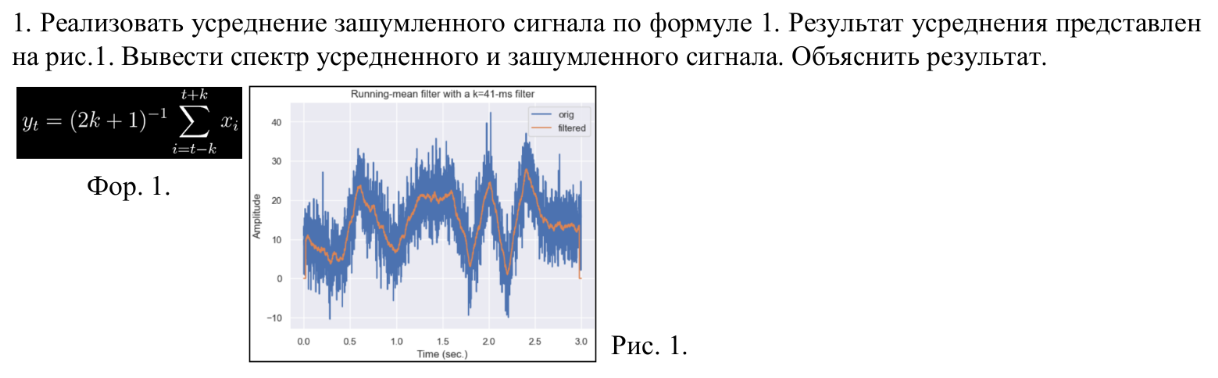

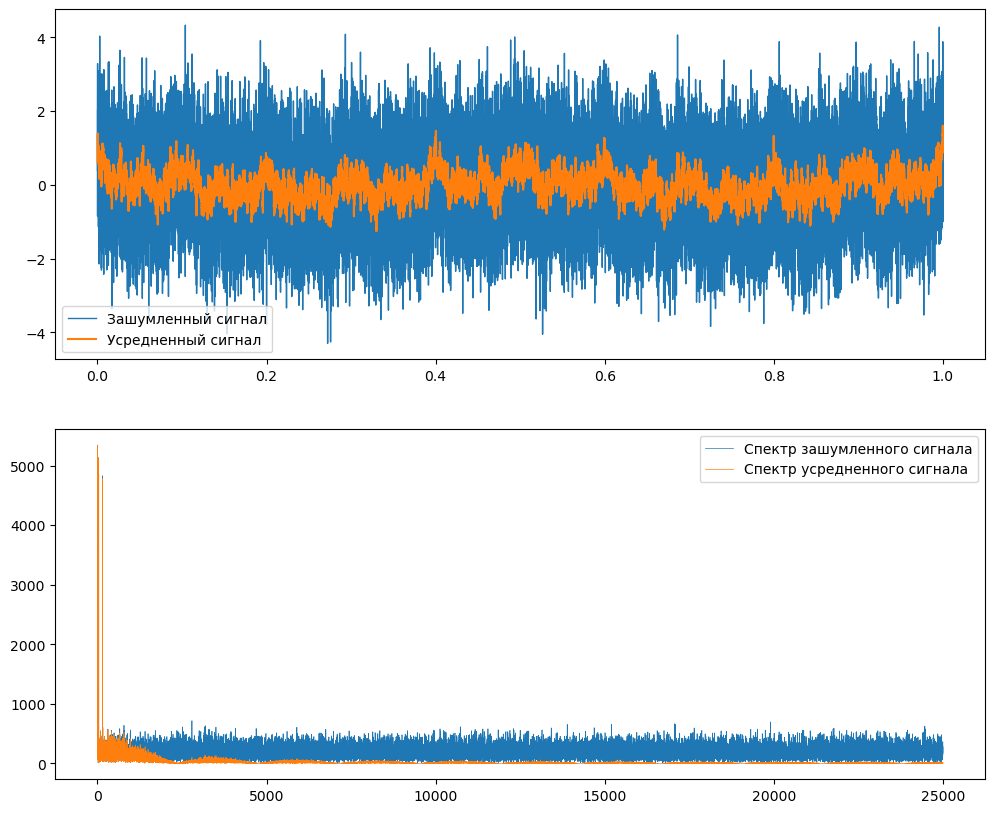

In [7]:
def add_noise(signal, noise_level=1):
    return signal + np.random.normal(0, noise_level, signal.shape)

def cos_signal(t, f, A=1):
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num = 50000 
f = [2, 10, 20, 35, 150]

t = np.linspace(0, 1, num)
y = cos_signal(t, f, A=0.2)
np.random.seed(40)
noisy_signal = add_noise(y, 1)
fft_signal = np.abs(np.fft.fft(noisy_signal))

# t = np.linspace(0, 10, 20000)
# signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 3 * t)
# noise = 0.8 * np.random.normal(size=len(t))
# noisy_signal = signal + noise
# fft_signal = np.abs(np.fft.fft(noisy_signal))

def mean_smooth(y, k=10):
    signal_smoothed = convolve(y, np.ones(2*k+1), mode='same') / (2*k+1)

    return signal_smoothed

signal_smoothed = mean_smooth(noisy_signal)
fft_smoothed = np.abs(np.fft.fft(signal_smoothed))

freqs = np.fft.fftfreq(len(noisy_signal), d=(t[1] - t[0]))

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(t, noisy_signal, label='Зашумленный сигнал', color='C0', linewidth=1)
axes[0].plot(t, signal_smoothed, label='Усредненный сигнал', color='C1')
axes[0].legend()
axes[1].plot(freqs[:len(freqs)//2], fft_signal[:len(freqs)//2], label='Спектр зашумленного сигнала', color='C0', linewidth=0.5)
axes[1].plot(freqs[:len(freqs)//2], fft_smoothed[:len(freqs)//2], label='Спектр усредненного сигнала', color='C1', linewidth=0.5)
axes[1].legend()

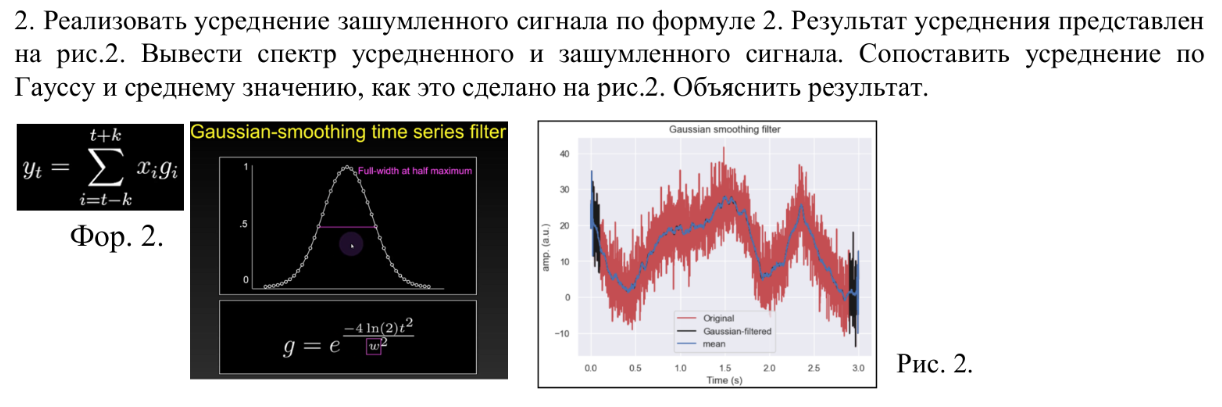

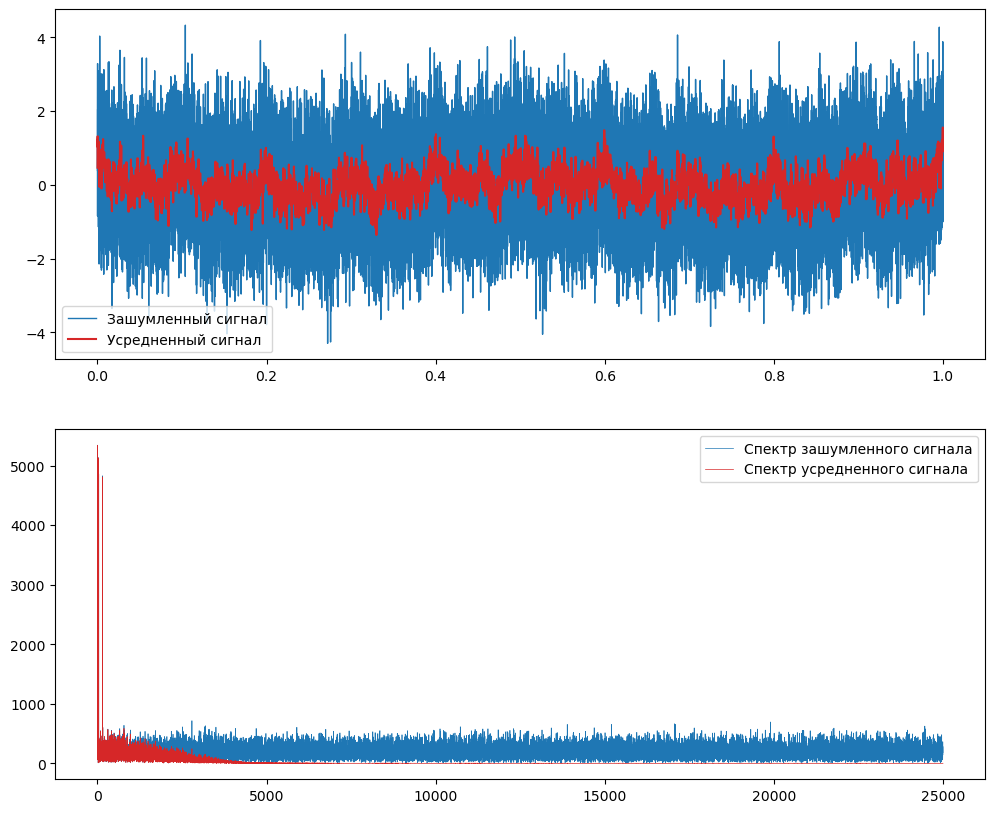

In [8]:
def gaus_smooth(y, omega=10, k=10):
    omega = 10 # параметр Гауссова ядра
    window_len = 2*k+1

    t_g = np.arange(window_len) - k
    gauss_kernel = np.exp(-4*np.log(2)*t_g**2 / omega**2)
    gauss_kernel /= gauss_kernel.sum()

    y_smoothed = convolve(y, gauss_kernel, mode='same')
    return y_smoothed

signal_smoothed_gaus = gaus_smooth(noisy_signal)
fft_smoothed_gaus = np.abs(np.fft.fft(signal_smoothed_gaus))

freqs = np.fft.fftfreq(len(noisy_signal), d=(t[1] - t[0]))

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(t, noisy_signal, label='Зашумленный сигнал', color='C0', linewidth=1)
axes[0].plot(t, signal_smoothed_gaus, label='Усредненный сигнал', color='C3')
axes[0].legend()
axes[1].plot(freqs[:len(freqs)//2], fft_signal[:len(freqs)//2], label='Спектр зашумленного сигнала', color='C0', linewidth=0.5)
axes[1].plot(freqs[:len(freqs)//2], fft_smoothed_gaus[:len(freqs)//2], label='Спектр усредненного сигнала', color='C3', linewidth=0.5)
axes[1].legend()

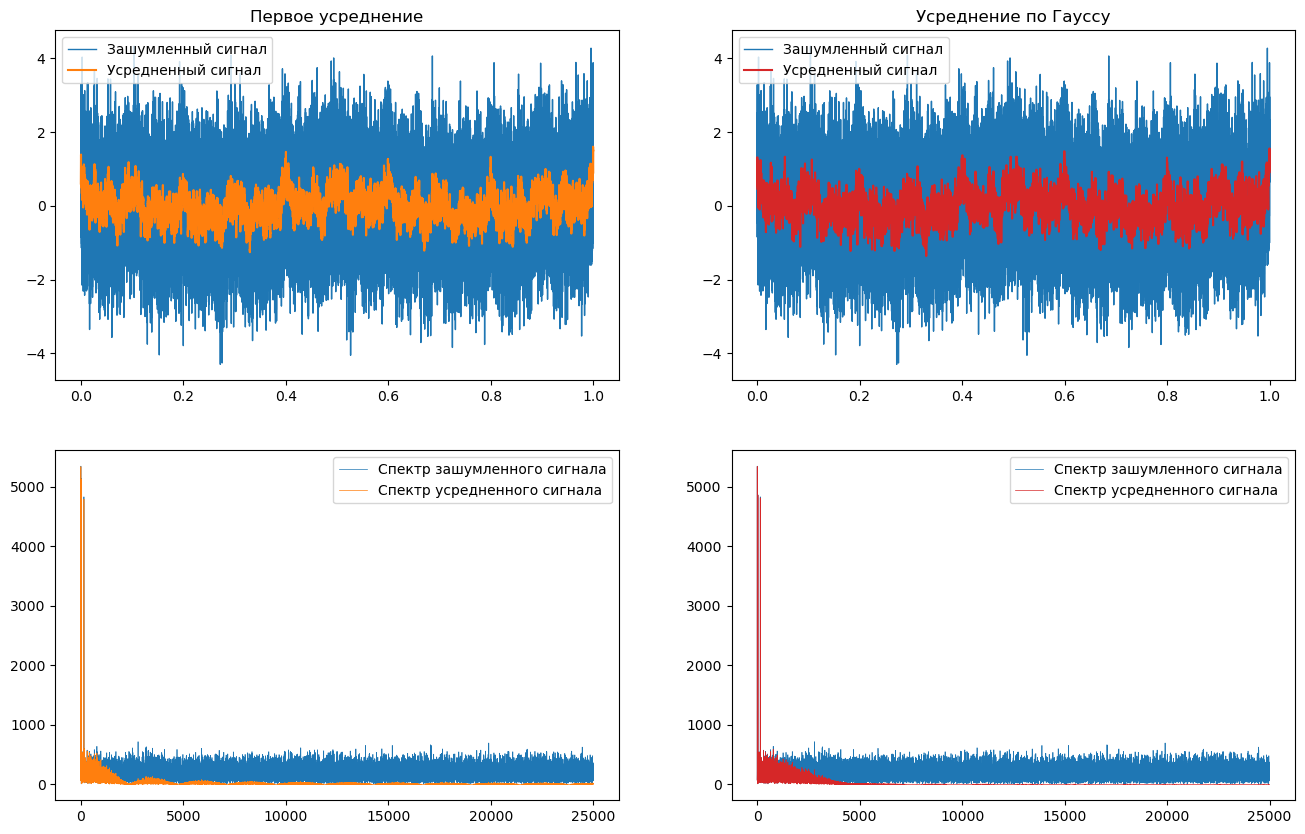

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].set_title(f'Первое усреднение')
axes[0][0].plot(t, noisy_signal, label='Зашумленный сигнал', color='C0', linewidth=1)
axes[0][0].plot(t, signal_smoothed, label='Усредненный сигнал', color='C1')
axes[0][0].legend()

axes[1][0].plot(freqs[:len(freqs)//2], fft_signal[:len(freqs)//2], label='Спектр зашумленного сигнала', color='C0', linewidth=0.5)
axes[1][0].plot(freqs[:len(freqs)//2], fft_smoothed[:len(freqs)//2], label='Спектр усредненного сигнала', color='C1', linewidth=0.5)
axes[1][0].legend()

axes[0, 1].set_title(f'Усреднение по Гауссу')
axes[0][1].plot(t, noisy_signal, label='Зашумленный сигнал', color='C0', linewidth=1)
axes[0][1].plot(t, signal_smoothed_gaus, label='Усредненный сигнал', color='C3')
axes[0][1].legend()

axes[1][1].plot(freqs[:len(freqs)//2], fft_signal[:len(freqs)//2], label='Спектр зашумленного сигнала', color='C0', linewidth=0.5)
axes[1][1].plot(freqs[:len(freqs)//2], fft_smoothed_gaus[:len(freqs)//2], label='Спектр усредненного сигнала', color='C3', linewidth=0.5)
axes[1][1].legend()

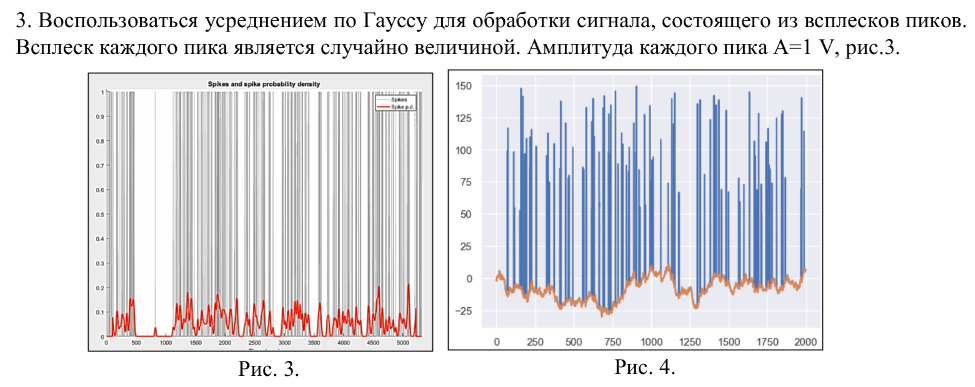

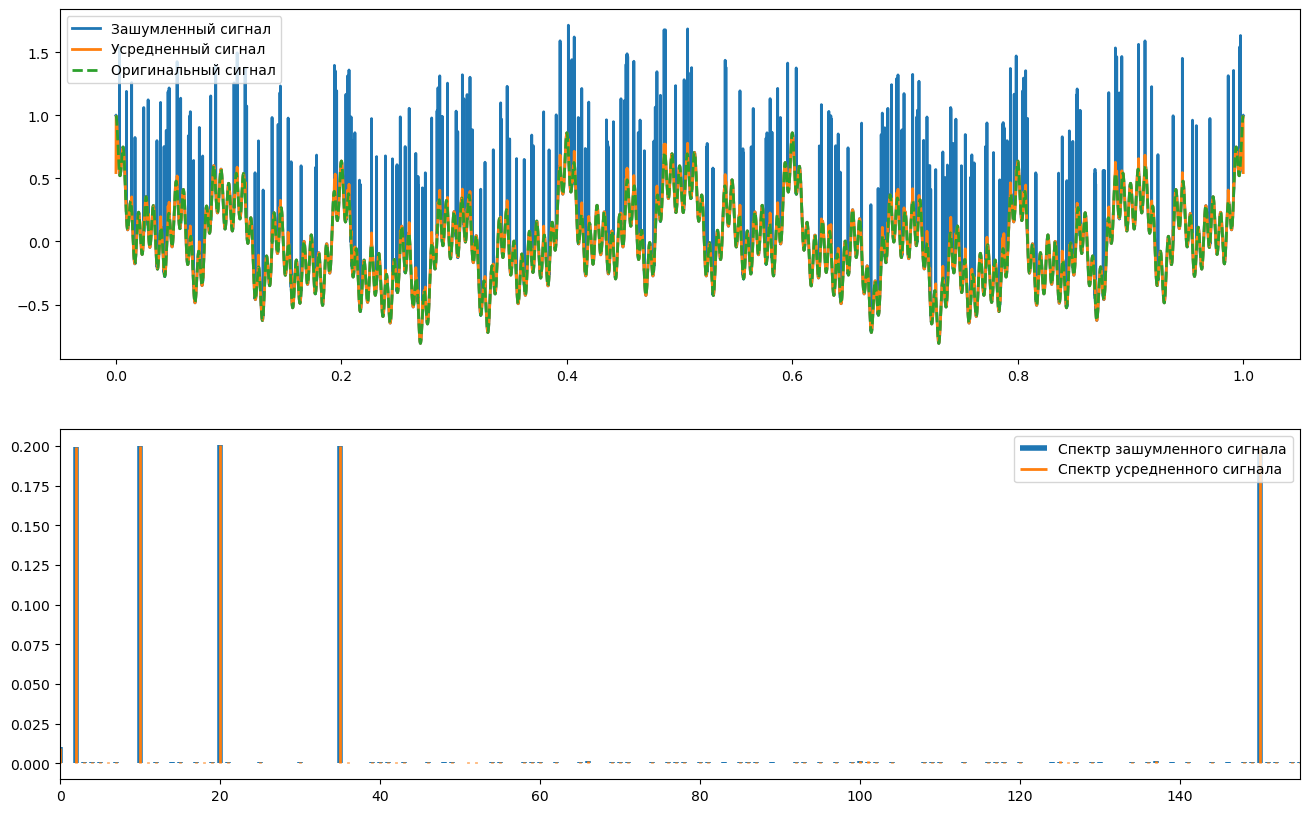

In [10]:
def add_spikes(signal, num_spikes, A=1, random_amplitude=False):
    signal_with_spikes = np.copy(signal)
    spike_indices = np.random.randint(0, len(signal), num_spikes)
    
    if random_amplitude:
        amplitudes = np.random.uniform(0, A, num_spikes)
        signal_with_spikes[spike_indices] += amplitudes
    else:
        signal_with_spikes[spike_indices] += A
    
    return signal_with_spikes

y_spiked3 = add_spikes(y, num//200, 1)
yff_signal3 = rfft(y_spiked3)
y_smoothed3 = gaus_smooth(y_spiked3, omega=100, k=20)
yff_smoothed3 = rfft(y_smoothed3)

freqs = rfftfreq(len(t), d=(t[1]-t[0]))
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(t, y_spiked3, linewidth=2,label='Зашумленный сигнал')
plt.plot(t, y_smoothed3, linewidth=2, label='Усредненный сигнал')
plt.plot(t, y, linewidth=2, linestyle='--', label='Оригинальный сигнал')
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freqs, 0, np.abs(yff_signal3) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freqs, 0, np.abs(yff_smoothed3) / num * 2, label='Спектр усредненного сигнала', linewidth=2, color='C1')
plt.xlim(-0.1, 155)
plt.legend()

plt.show()



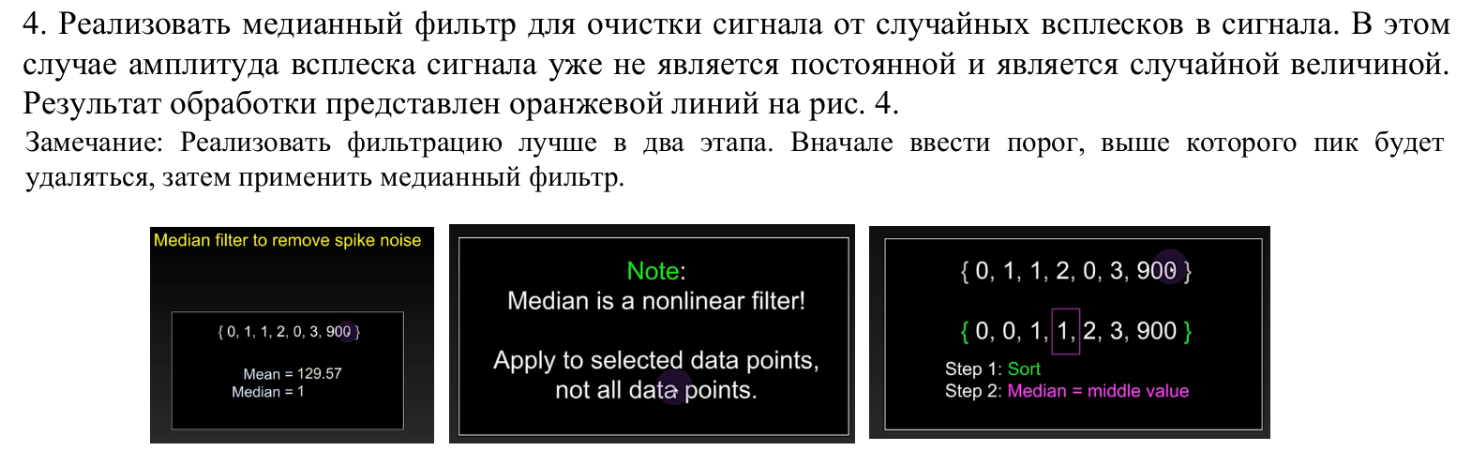

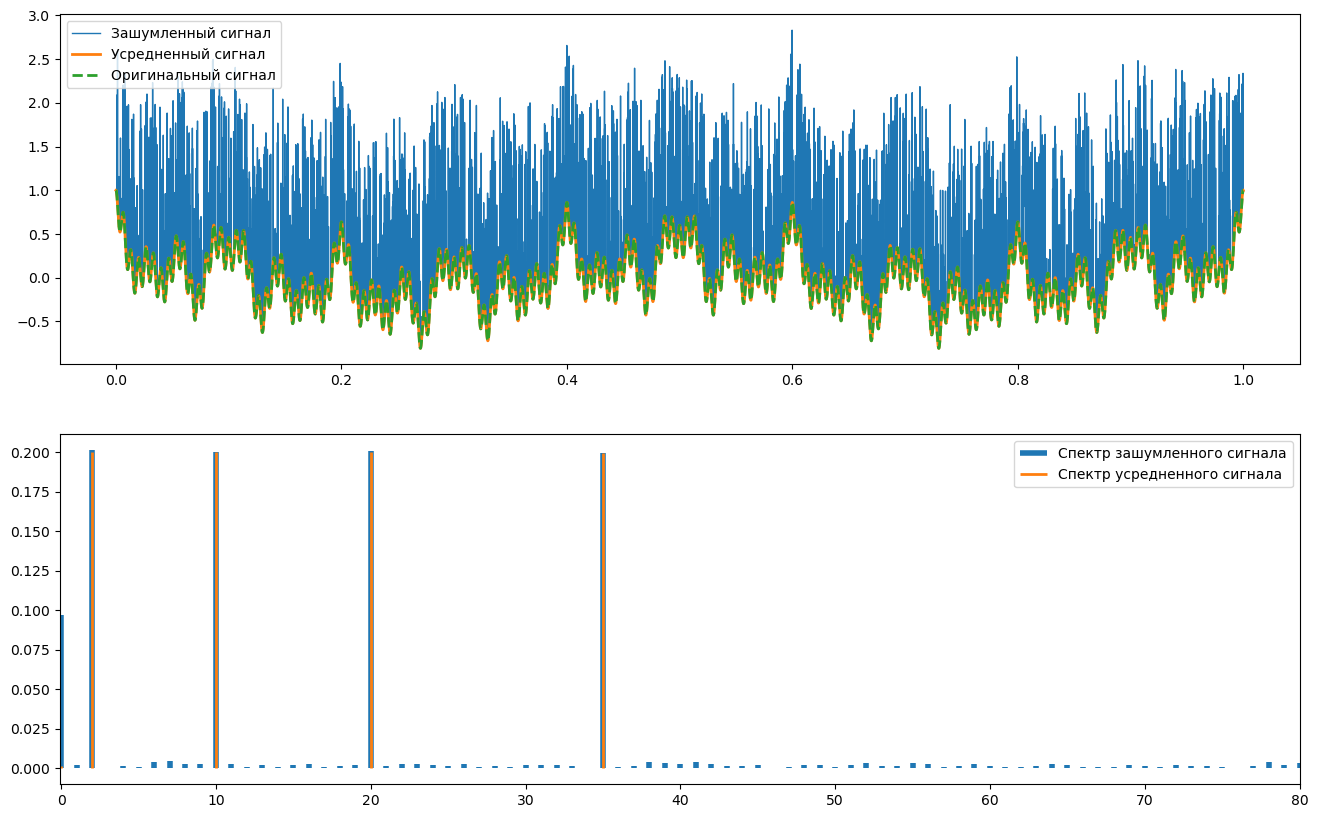

In [18]:
# def median_smooth(y, k=10, threshold=None):
#     y_smoothed = np.zeros_like(y)

#     for i in range(len(y)):
#         start = max(0, i - k)
#         end = min(len(y), i + k + 1)
#         window = y[start:end]
#         median_value = np.median(window)
        
#         if threshold is not None and abs(y[i] - median_value) > threshold:
#             y_smoothed[i] = median_value
#         else:
#             y_smoothed[i] = y[i]

#     yff_smoothed = rfft(y_smoothed)

#     return y_smoothed, yff_smoothed

def median_smooth(y, k=5):
    y_smoothed = np.zeros_like(y)
    for i in range(len(y)):
        start = max(0, i - k)
        end = min(len(y), i + k + 1)
        y_smoothed[i] = np.median(y[start:end])

    yff_smoothed = rfft(y_smoothed)

    return y_smoothed, yff_smoothed

y_spiked4 = add_spikes(y, num//20, 2, random_amplitude=True)
yff_signal4 = rfft(y_spiked4)
y_smoothed4, yff_smoothed4 = median_smooth(y_spiked4)
# y_smoothed4, yff_smoothed4 = median_smooth(y_spiked4, threshold=1.5)

plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(t, y_spiked4, linewidth=1,label='Зашумленный сигнал')
plt.plot(t, y_smoothed4, linewidth=2, label='Усредненный сигнал')
plt.plot(t, y, linewidth=2, linestyle='--', label='Оригинальный сигнал')
plt.legend()

plt.subplot(2, 1, 2)
plt.vlines(freqs, 0, np.abs(yff_signal4) / num * 2, label='Спектр зашумленного сигнала', linewidth=4, color='C0')
plt.vlines(freqs, 0, np.abs(yff_smoothed4) / num * 2, label='Спектр усредненного сигнала', linewidth=2, color='C1')
plt.xlim(-0.1, 80)
plt.legend()

plt.show()

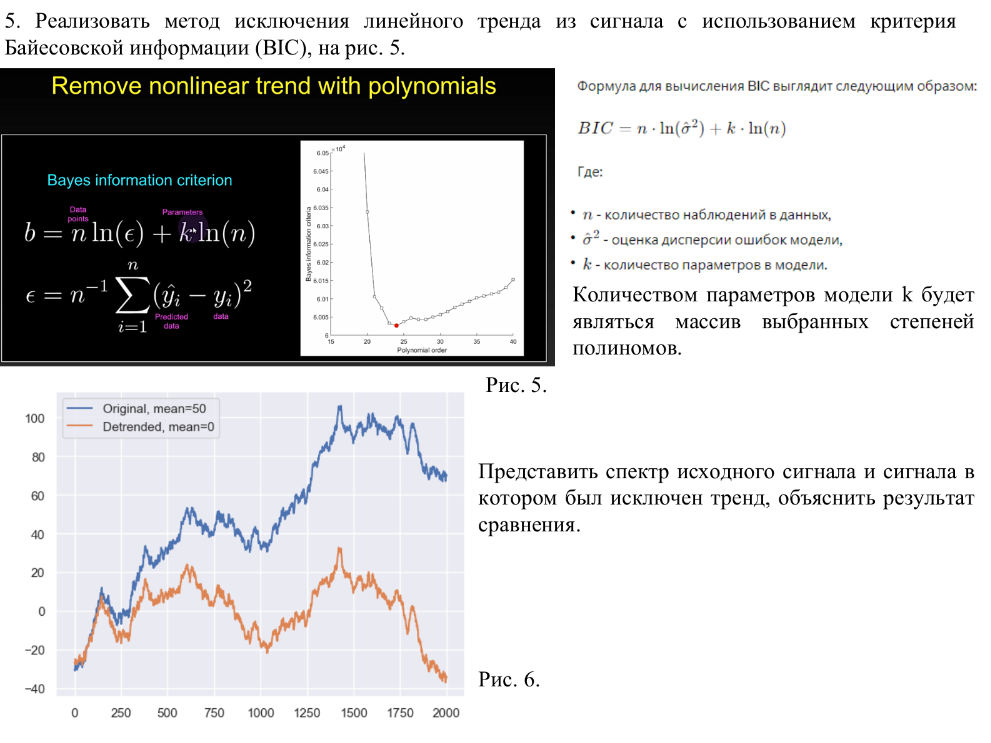

/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, k)
/tmp/ipykernel_6018/3058976316.py:14: RankWarning: Polyfit may be poorly

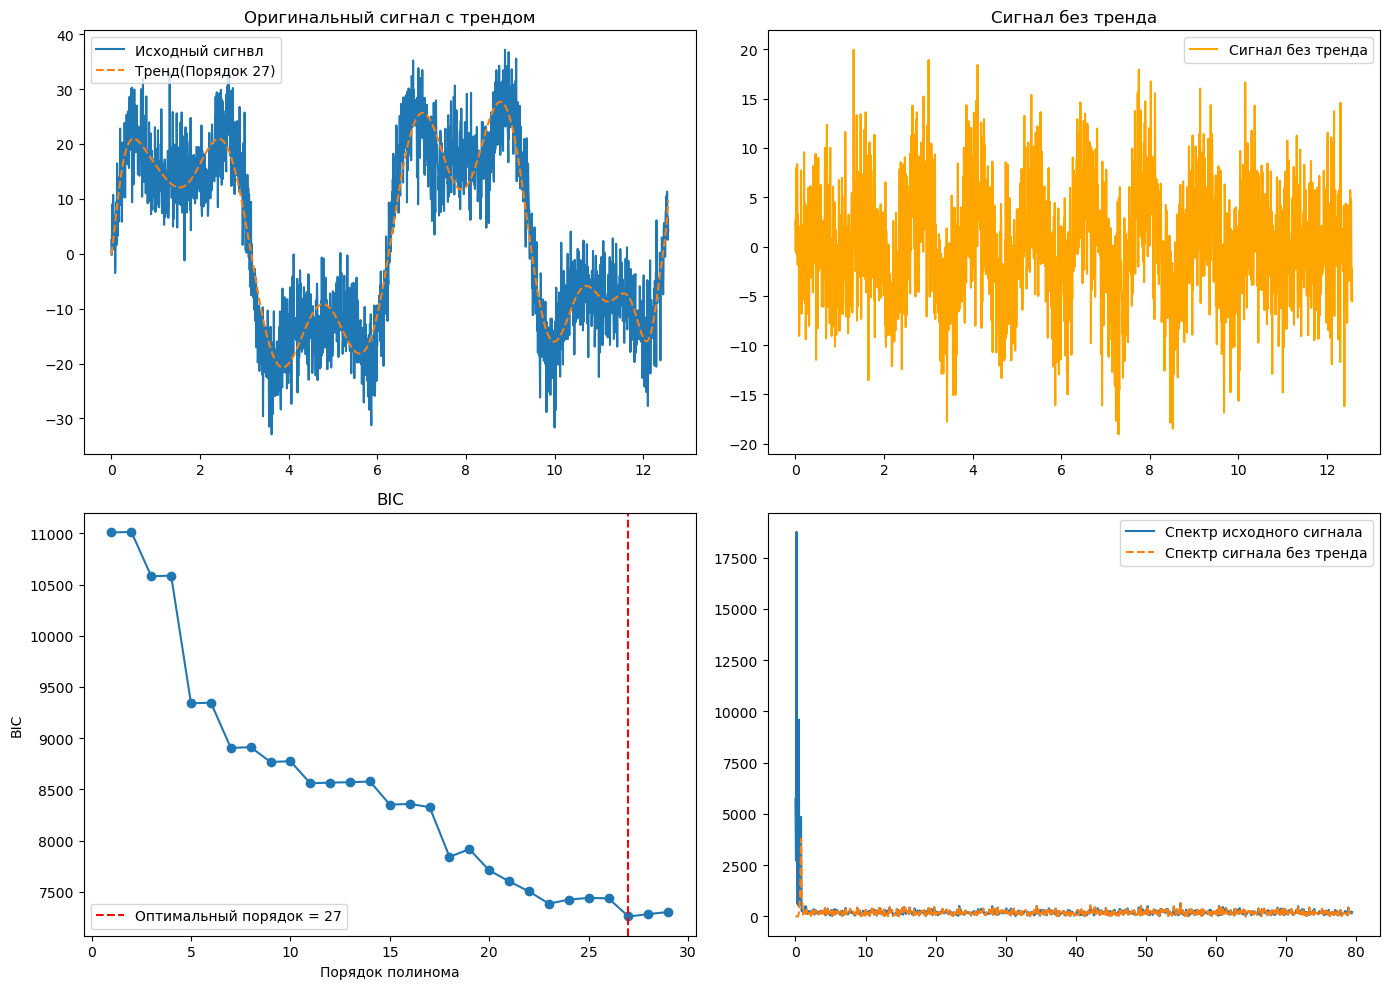

In [ ]:
np.random.seed(42)
n = 2000
x = np.linspace(0, 4 * np.pi, n)
trend = 0.05 * x**2
signal = 20 * np.sin(x) + 10 * np.sin(3 * x) + 5 * np.sin(5 * x)
noise = np.random.normal(0, 5, n)
y = trend + signal + noise

bic_values = []
poly_orders = np.arange(1, 30) 

for k in poly_orders:
    # Полиномиальная аппроксимация
    coeffs = np.polyfit(x, y, k)
    trend_poly = np.polyval(coeffs, x)
    
    # Остатки
    residuals = y - trend_poly
    mse = np.mean(residuals**2)
    
    # Вычисление BIC
    bic = n * np.log(mse) + k * np.log(n)
    bic_values.append(bic)

# Оптимальный порядок полинома
optimal_k = poly_orders[np.argmin(bic_values)]
coeffs_opt = np.polyfit(x, y, optimal_k)
trend_opt = np.polyval(coeffs_opt, x)

# Удаление тренда
y_detrended = y - trend_opt

freq = fftfreq(n, d=(x[1] - x[0])) 
spectrum_original = np.abs(fft(y))  
spectrum_detrended = np.abs(fft(y_detrended))

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(x, y, label="Исходный сигнвл")
plt.plot(x, trend_opt, label=f"Тренд(Порядок {optimal_k})", linestyle="--")
plt.title("Оригинальный сигнал с трендом")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y_detrended, label="Сигнал без тренда", color="orange")
plt.title("Сигнал без тренда")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(poly_orders, bic_values, marker="o")
plt.title("BIC")
plt.xlabel("Порядок полинома")
plt.ylabel("BIC")
plt.axvline(optimal_k, color="red", linestyle="--", label=f"Оптимальный порядок = {optimal_k}")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(freq[:n // 2], spectrum_original[:n // 2], label="Спектр исходного сигнала")
plt.plot(freq[:n // 2], spectrum_detrended[:n // 2], label="Спектр сигнала без тренда", linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()
